In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from madule import simulation
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
"""simulate lots of data to calculate the optimal choice responce"""

for i in range(121, 201):
    # Simulation number
    simNumber = "Optim" + str(i)
    print("Simulation: ", simNumber)
    "Set mean and STD of Learning rate for Action Value Conditions"
    alphaAct_mu = np.round(np.random.uniform(low=.1, high=.9, size= (2,2)), 2)
    alphaAct_sd = np.array(.0)

    "Set mean and STD of Learning rate for Color Value Conditions"
    alphaClr_mu = np.round(np.random.uniform(low=.1, high=.9, size= (2,2)), 2)
    alphaClr_sd = np.array(.0)

    "Set mean and STD of Relative Contribution Parameter"
    weightAct_mu = np.round(np.random.uniform(low=.1, high=.9, size= (2,2)), 2)
    weightAct_sd = np.array(.0)

    "Set mean and STD of Sensitivity Parameter"
    beta_mu = np.round(np.random.uniform(low=.005, high=.9, size= (2)), 2)
    beta_sd = np.array(0.0) 

    """True values of individual-level parameters are randomly taken from predefined hierarchical level parameters, 
    Therfpre, call trueParamAllParts function to generate and save true parameters for each participant"""
    simulation.trueParamAllParts(alphaAct_mu=alphaAct_mu, alphaAct_sd=alphaAct_sd,
                                 alphaClr_mu=alphaClr_mu, alphaClr_sd=alphaClr_sd,
                                 weightAct_mu=weightAct_mu, weightAct_sd=weightAct_sd,
                                 beta_mu=beta_mu, beta_sd=beta_sd,
                                 simNumber=simNumber)

    # Thi Final step is to simulate data from the grand truth parameters that has been generated from previous step
    simulation.simulateActClrAllParts(simNumber=simNumber)

    """Pooling data all data and then save it"""
    # List of subjects
    subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
               'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045',
               'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060',
               'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074',
               'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081',
               'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090',
               'sub-092', 'sub-108', 'sub-109']

    # Labeling Group level for each participant
    randomGroupLabel = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/randomGroupLabel.csv')
    # Dataframe for concatenating data
    dataAll = pd.DataFrame([])
    # Loop over list of participatns
    for subName in subList:
        # Main directory of the simupated participatns
        subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
        # Directory of the especifit simulated participant
        dirc = subMainDirec + subName + '/' + str(simNumber) + '/' + subName + '-simulated-data-with-task-design-true-param.csv'
        # Read the simulated participant
        data = pd.read_csv(dirc)
        # Set the new column of the participants' name
        data['sub_ID'] = subName
        # Get the group label of session 1 and session 2 for the specific participant
        labelSes1 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-02'])
        labelSes2 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-03'])
        # Put the group label
        data.loc[data['session'] == 1, 'group'] = str(labelSes1)
        data.loc[data['session'] == 2, 'group'] = str(labelSes2)

        # Concatenating each dataframe
        dataAll = pd.concat([dataAll, data])    

    # Save concatenated data over all particiapnts
    dataAll.to_csv(subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv', index=False)

Simulation:  Optim121
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim122
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim123
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim124
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim125
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim126
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim127
All true parameters for each participant have been generated and s

Simulation:  Optim175
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim176
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim177
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim178
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim179
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim180
All true parameters for each participant have been generated and saved successfully!
All simulations have been done successfully!
Simulation:  Optim181
All true parameters for each participant have been generated and s

In [55]:
# Collect all simulated data
dataAllSims = pd.DataFrame({})
for i in range(1, 201):
    # Simulation number
    simNumber = "Optim" + str(i)
    # Main directory of the simupated participatns
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
    # Directory of the especifit simulated participant
    dirc = subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv'
    # Read the simulated participant
    data = pd.read_csv(dirc)
    data['Sim'] = i+1
    dataAllSims = pd.concat([data, dataAllSims])
    
# Seperate all data based on session and condition 
dataAllSims_ses1_Act = dataAllSims.loc[(dataAllSims['session']==1) & (dataAllSims['block']=='Act')]
dataAllSims_ses1_Stim = dataAllSims.loc[(dataAllSims['session']==1) & (dataAllSims['block']=='Stim')]
dataAllSims_ses2_Act = dataAllSims.loc[(dataAllSims['session']==2) & (dataAllSims['block']=='Act')]
dataAllSims_ses2_Stim = dataAllSims.loc[(dataAllSims['session']==2) & (dataAllSims['block']=='Stim')]

In [88]:
# Average across participatns for each simulation
grouped_df = dataAllSims_ses2_Act.groupby(['Sim', 'weightAct', 'alphaAct', 'alphaClr', 'beta'], as_index = False)['correctChoice'].mean()


/tmp/ipykernel_2149297/3391897170.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


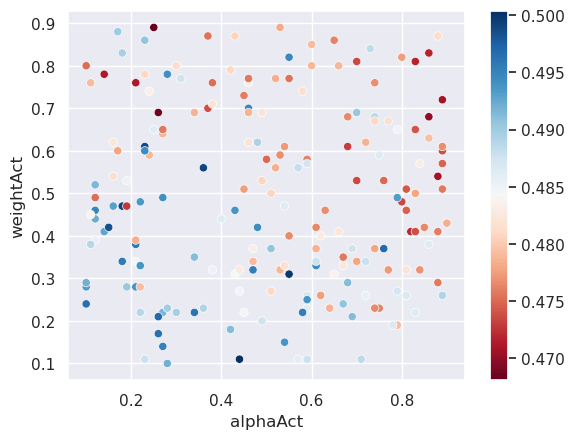

In [96]:
# Plot scatterplot with color bar
sns.set()
tips = grouped_df
ax = sns.scatterplot(x="alphaAct", y="weightAct", hue="correctChoice",
                     palette='RdBu', data=tips)

norm = plt.Normalize(tips['correctChoice'].min(), tips['correctChoice'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()